In [21]:
from typing import TypedDict, List, Any, Union
from langchain_core.messages import HumanMessage, AIMessage, ToolMessage, SystemMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv
import os
from IPython.display import Image, display

In [22]:
load_dotenv

<function dotenv.main.load_dotenv(dotenv_path: Union[str, ForwardRef('os.PathLike[str]'), NoneType] = None, stream: Optional[IO[str]] = None, verbose: bool = False, override: bool = False, interpolate: bool = True, encoding: Optional[str] = 'utf-8') -> bool>

In [23]:
#DOMAIN = os.getenv('DOMAIN')
#ADMIN_EMAIL = os.getenv('ADMIN_EMAIL')

In [24]:
class AgentState(TypedDict):
    messages: List[HumanMessage]

In [25]:
llm = ChatOpenAI(model="gpt-4o")

In [26]:
def process(state: AgentState) -> AgentState:
    """
    Node to process
    """
    
    response = llm.invoke(state['messages'])
    print(f"\nAI: {response.content}")
    return state

In [27]:
graph = StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END)

In [28]:
agent = graph.compile()

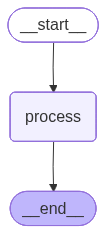

In [29]:
display(Image(agent.get_graph().draw_mermaid_png()))

In [30]:
user_input = input("Enter: ")

In [31]:
agent.invoke({"messages":[HumanMessage(content=user_input)]})


AI: Hello! How can I assist you today?


{'messages': [HumanMessage(content='aa', additional_kwargs={}, response_metadata={})]}

In [32]:
class AgentState(TypedDict):
    messages: List[Union[HumanMessage, AIMessage]]

llm = ChatOpenAI(model="gpt-4o")

In [34]:
def process(state: AgentState) -> AgentState:
    """
    This node will solve the request you input
    """
    response = llm.invoke(state["messages"])
    state["messages"].append(AIMessage(content=response.content))

    print(f"AI: {response.content}")

    return state

In [35]:
graph = StateGraph(AgentState)
graph.add_node("process_node", process)
graph.add_edge(START, "process_node")
graph.add_edge("process_node", END)

In [37]:
agent = graph.compile()

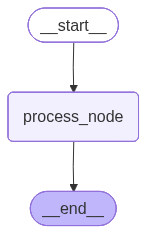

In [38]:
agent

In [40]:
conversation_history = []

In [41]:
user_input = input("Enter: ")

In [42]:
while user_input!="exit":
    conversation_history.append(HumanMessage(user_input))
    result = agent.invoke({"messages": conversation_history})
    print(result["messages"])
    conversation_history = result["messages"]
    user_input = input("Enter: ")

AI: Olá! Estou indo bem, obrigado. E você, como está?
[HumanMessage(content='Olá Chat, como vai você?', additional_kwargs={}, response_metadata={}), AIMessage(content='Olá! Estou indo bem, obrigado. E você, como está?', additional_kwargs={}, response_metadata={}, tool_calls=[], invalid_tool_calls=[])]
AI: Que ótimo! Se tiver alguma dúvida ou se precisar de ajuda com o LangGraph ou qualquer outra coisa, fique à vontade para perguntar. Estou aqui para ajudar!
[HumanMessage(content='Olá Chat, como vai você?', additional_kwargs={}, response_metadata={}), AIMessage(content='Olá! Estou indo bem, obrigado. E você, como está?', additional_kwargs={}, response_metadata={}, tool_calls=[], invalid_tool_calls=[]), HumanMessage(content='Bem também. Estou testando langgraph com você neste momento', additional_kwargs={}, response_metadata={}), AIMessage(content='Que ótimo! Se tiver alguma dúvida ou se precisar de ajuda com o LangGraph ou qualquer outra coisa, fique à vontade para perguntar. Estou aqui

In [43]:
conversation_history

[HumanMessage(content='Olá Chat, como vai você?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Olá! Estou indo bem, obrigado. E você, como está?', additional_kwargs={}, response_metadata={}, tool_calls=[], invalid_tool_calls=[]),
 HumanMessage(content='Bem também. Estou testando langgraph com você neste momento', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Que ótimo! Se tiver alguma dúvida ou se precisar de ajuda com o LangGraph ou qualquer outra coisa, fique à vontade para perguntar. Estou aqui para ajudar!', additional_kwargs={}, response_metadata={}, tool_calls=[], invalid_tool_calls=[])]